<a href="https://colab.research.google.com/github/Grb689/Digital-portfolio/blob/main/Using%20matplot%20log%20any%20diagram%20spykit%20search%20mean%20square%20error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

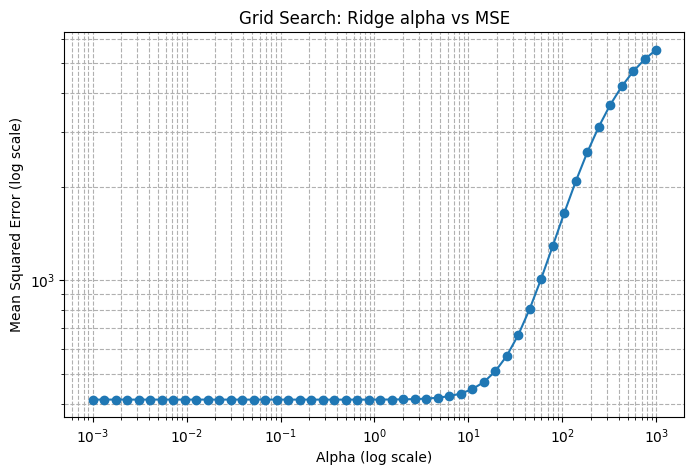

Best alpha: 0.49417133613238334
Best CV MSE: 412.7135


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# 2. Define model and parameter grid
model = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 50)}  # Ridge regularization strength

# 3. Set up GridSearch to minimize MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
gs = GridSearchCV(model, param_grid, scoring=mse_scorer, cv=5, return_train_score=True)
gs.fit(X, y)

# 4. Extract results
alphas = gs.param_grid['alpha']
mean_test_mse = -gs.cv_results_['mean_test_score']  # take negative to get positive MSE

# 5. Plot MSE vs alpha on log-log scale
plt.figure(figsize=(8,5))
plt.plot(alphas, mean_test_mse, marker='o', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('Grid Search: Ridge alpha vs MSE')
plt.grid(True, which='both', ls='--')
plt.show()

# 6. Best model info
print(f"Best alpha: {gs.best_params_['alpha']}")
print(f"Best CV MSE: {-gs.best_score_:.4f}")
